In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris

import numpy as np
from matplotlib import pyplot as plt

from art.estimators.classification import SklearnClassifier
from art.attacks.evasion import ZooAttack
from art.utils import load_mnist

import warnings
warnings.filterwarnings('ignore')

In [2]:
(x_train, y_train), (x_test, y_test), min_, max_ = load_mnist()

n_samples_train = x_train.shape[0]
n_features_train = x_train.shape[1] * x_train.shape[2] * x_train.shape[3]
n_samples_test = x_test.shape[0]
n_features_test = x_test.shape[1] * x_test.shape[2] * x_test.shape[3]

x_train = x_train.reshape(n_samples_train, n_features_train)
x_test = x_test.reshape(n_samples_test, n_features_test)

y_train = np.argmax(y_train, axis=1)
y_test = np.argmax(y_test, axis=1)

n_samples_max = 200
x_train = x_train[0:n_samples_max]
y_train = y_train[0:n_samples_max]
x_test = x_test[0:n_samples_max]
y_test = y_test[0:n_samples_max]

In [5]:
decision_model = DecisionTreeClassifier(max_depth=None, min_samples_split=2, 
                               min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, 
                               random_state=None, max_leaf_nodes=50, min_impurity_decrease=0.0, 
                               min_impurity_split=None, class_weight=None, presort=False)

In [7]:
randomforest_model = RandomForestClassifier(max_depth=None, min_samples_split=2, 
                               min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, 
                               random_state=None, max_leaf_nodes=50, min_impurity_decrease=0.0, 
                               min_impurity_split=None, class_weight=None)

In [8]:
decision_model.fit(X=x_train, y=y_train)
randomforest_model.fit(X=x_train, y=y_train)

RandomForestClassifier(max_features=None, max_leaf_nodes=50)

In [9]:
d_classifier = SklearnClassifier(model=decision_model)
r_classifier = SklearnClassifier(model=randomforest_model)

In [10]:
d_zoo = ZooAttack(classifier=d_classifier, confidence=0.0, targeted=False, learning_rate=1e-1, max_iter=100,
                binary_search_steps=20, initial_const=1e-3, abort_early=True, use_resize=False, 
                use_importance=False, nb_parallel=10, batch_size=1, variable_h=0.25)

In [11]:
r_zoo = ZooAttack(classifier=r_classifier, confidence=0.0, targeted=False, learning_rate=1e-1, max_iter=100,
                binary_search_steps=20, initial_const=1e-3, abort_early=True, use_resize=False, 
                use_importance=False, nb_parallel=10, batch_size=1, variable_h=0.25)

In [12]:
d_x_train_adv = d_zoo.generate(x_train)
d_x_test_adv = d_zoo.generate(x_test)

ZOO:   0%|          | 0/200 [00:00<?, ?it/s]

ZOO:   0%|          | 0/200 [00:00<?, ?it/s]

In [13]:
r_x_train_adv = r_zoo.generate(x_train)
r_x_test_adv = r_zoo.generate(x_test)

ZOO:   0%|          | 0/200 [00:00<?, ?it/s]

ZOO:   0%|          | 0/200 [00:00<?, ?it/s]

기존 데이터를 이용한 학습 정도 : 1.0000
기존 데이터를 이용하여 학습한 결과: 5


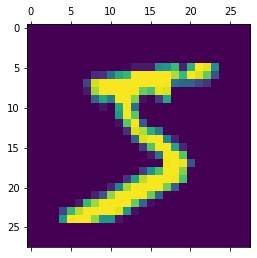

In [33]:
# 공격 받기 전 의사 결정 트리의 학습 정도와
# 학습 결과 출력

score = decision_model.score(x_train, y_train)
print("기존 데이터를 이용한 학습 정도 : %.4f" % score)
plt.matshow(x_train[0, :].reshape((28, 28)))
plt.clim(0, 1)
prediction = decision_model.predict(x_train[0:1, :])[0]
print("기존 데이터를 이용하여 학습한 결과: %i" % prediction)

공격 당한 데이터를 이용한 학습 정도 : 0.1250
공격 당한 데이터를 이용하여 학습한 결과 : 8


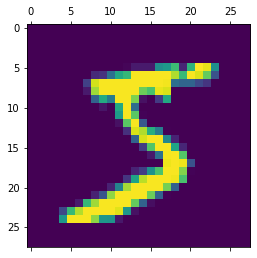

In [36]:
# ZOO 공격을 받고 나서 의사 결정 트리의 학습 정도와
# 학습 결과 출력

score = decision_model.score(d_x_train_adv, y_train)
print("공격 당한 데이터를 이용한 학습 정도 : %.4f" % score)
plt.matshow(d_x_train_adv[0, :].reshape((28, 28)))
plt.clim(0, 1)
prediction = decision_model.predict(d_x_train_adv[0:1, :])[0]
print("공격 당한 데이터를 이용하여 학습한 결과 : %i" % prediction)

기존 데이터를 이용한 학습 정도 : 1.0000
기존 데이터를 이용하여 학습한 결과: 5


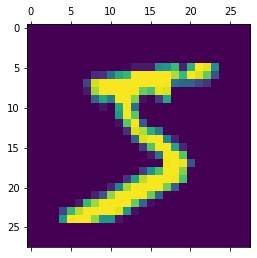

In [37]:
# 공격 받기 전 랜덤 포레스트의 학습 정도와
# 학습 결과 출력

score = randomforest_model.score(x_train, y_train)
print("기존 데이터를 이용한 학습 정도 : %.4f" % score)
plt.matshow(x_train[0, :].reshape((28, 28)))
plt.clim(0, 1)
prediction = randomforest_model.predict(x_train[0:1, :])[0]
print("기존 데이터를 이용하여 학습한 결과: %i" % prediction)

공격 당한 데이터를 이용한 학습 정도 : 0.0750
공격 당한 데이터를 이용하여 학습한 결과 : 6


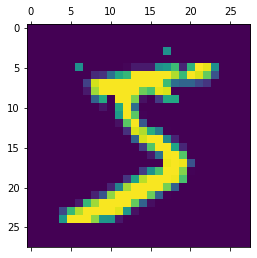

In [38]:
# ZOO 공격을 받고 나서 랜덤 포레스트의 학습 정도와
# 학습 결과 출력

score = randomforest_model.score(r_x_train_adv, y_train)
print("공격 당한 데이터를 이용한 학습 정도 : %.4f" % score)
plt.matshow(r_x_train_adv[0, :].reshape((28, 28)))
plt.clim(0, 1)
prediction = randomforest_model.predict(r_x_train_adv[0:1, :])[0]
print("공격 당한 데이터를 이용하여 학습한 결과 : %i" % prediction)

기존 데이터를 이용한 학습 정도 : 1.0000
기존 데이터를 이용하여 학습한 결과 : 7


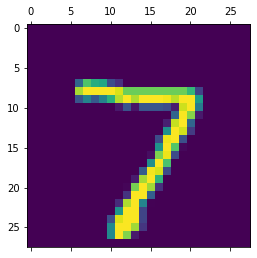

In [39]:
# 공격 받기 전 의사 결정 트리의 학습 정도와
# 학습 결과 출력

score = decision_model.score(x_train, y_train)
print("기존 데이터를 이용한 학습 정도 : %.4f" % score)
plt.matshow(x_test[0, :].reshape((28, 28)))
plt.clim(0, 1)
prediction = decision_model.predict(x_test[0:1, :])[0]
print("기존 데이터를 이용하여 학습한 결과 : %i" % prediction)

공격 당한 데이터를 이용한 학습 정도 : 0.1650
공격 당한 데이터를 이용하여 학습한 결과 : 1


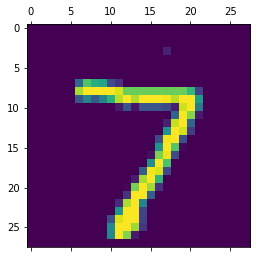

In [40]:
# ZOO 공격을 받고 나서 의사 결정 트리의 학습 정도와
# 학습 결과 출력

score = decision_model.score(d_x_test_adv, y_test)
print("공격 당한 데이터를 이용한 학습 정도 : %.4f" % score)
plt.matshow(d_x_test_adv[0, :].reshape((28, 28)))
plt.clim(0, 1)
prediction = decision_model.predict(d_x_test_adv[0:1, :])[0]
print("공격 당한 데이터를 이용하여 학습한 결과 : %i" % prediction)

기존 데이터를 이용한 학습 정도 : 1.0000
기존 데이터를 이용하여 학습한 결과 : 7


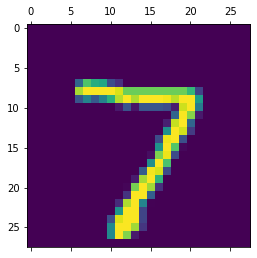

In [41]:
# 공격 받기 전 랜덤 포레스트의 학습 정도와
# 학습 결과 출력

score = randomforest_model.score(x_train, y_train)
print("기존 데이터를 이용한 학습 정도 : %.4f" % score)
plt.matshow(x_test[0, :].reshape((28, 28)))
plt.clim(0, 1)
prediction = randomforest_model.predict(x_test[0:1, :])[0]
print("기존 데이터를 이용하여 학습한 결과 : %i" % prediction)

공격 당한 데이터를 이용한 학습 정도 : 0.1500
공격 당한 데이터를 이용하여 학습한 결과 : 6


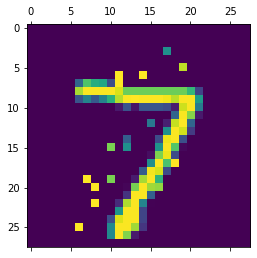

In [42]:
# ZOO 공격을 받고 나서 랜덤 포레스트의 학습 정도와
# 학습 결과 출력

score = randomforest_model.score(r_x_test_adv, y_test)
print("공격 당한 데이터를 이용한 학습 정도 : %.4f" % score)
plt.matshow(r_x_test_adv[0, :].reshape((28, 28)))
plt.clim(0, 1)
prediction = randomforest_model.predict(r_x_test_adv[0:1, :])[0]
print("공격 당한 데이터를 이용하여 학습한 결과 : %i" % prediction)